# Introduction to Deep Learing
Actually this is a very basic introduction to Machine Learning
# First intuitions
## Linear regression

In [1]:
# Initial code and auxiliar functions. Don't pay attention to this
import numpy as np
import matplotlib.pyplot as plt

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

/home/francisco/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/francisco/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# plot a function f from i0 to i1
def plot_f(f,i0,i1):
    x=np.arange(i0,i1,0.1)
    y=f(x)
    plt.plot(x,y)
# plot tangent line at point f(w) in w domain
def plot_df(f,df,w):
    # work out line parameters
    # prediction point for given weights w
    y=f(w)
    m=df(w)
    c=y-m*w
    # plot prediction point y
    plt.plot(w,y,"*")
    # plot tangent line at y
    x=np.arange(w-1,w+1,0.1)
    y=m*x+c
    plt.plot(x,y)

## Linear regression example
Given these data point (-2.4,7),(4.5,9),(6.2,18) we want to get the line closest to them. 

In [3]:
# Data points
Dx = [-2,4.5, 6.2]
Dy = [ 7,9  ,18  ]

As we can see below there is not any line passing through all points. But we can work out the nearest one.

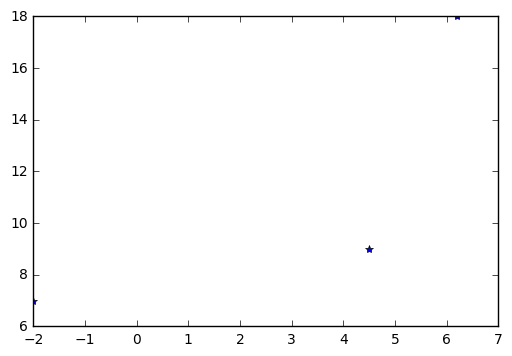

In [4]:
# Plot the points using matplotlib
plt.plot(Dx,Dy,"*",color="blue")
plt.show()  # You must call plt.show() to make graphics appear.

A random guess could be the line $f(x)=1.2x+5$

In [5]:
# Linear model
def f(x):
    #y=  m*x+c
    #y= w1*x+w0
    y =1.2*x+5
    return y

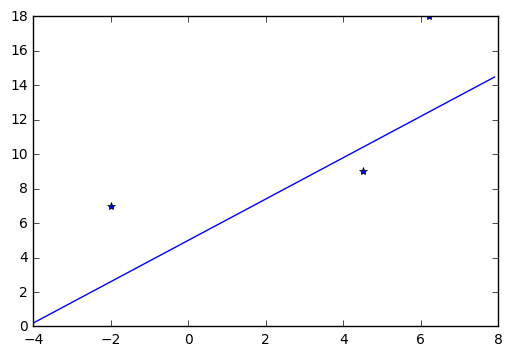

In [6]:
# Plot the line f
plot_f(f,-4,8)

# Plot the points using matplotlib
plt.plot(Dx,Dy,"*",color="blue")
plt.show()  # You must call plt.show() to make graphics appear.

### How good is this function? 
Well given -2 we want f(-2) be as near as posible to 7, given 4.5 we want f(4.5) be as near as posible to 9 and given 6.2 we want f(6.2) be as near as posible to 18.

#### But, What "near" means? 
Well there are many answers to this question but the traditional one is: the sum of squared differences. That is we substract f(-2) from 7, f(4.5) from 9 and f(6.2) from 18,

"We say we substract the the predicted value $f(x)$ from actual value $y$"

And in order to have all values positives, since we don't matter if the differences is positive or negative, we can square this difference and add them all. This calculation is know as: Cost, Loss, Error, Square Error,...

The next code work out this "near"

In [7]:
L=( 7-f(-2.0))**2+  ( 9-f( 4.5))**2+  (18-f( 6.2))**2
print("Near/Cost/Loss/Error=",L)

Near/Cost/Loss/Error= 52.23360000000001


In following text we are going to use the term Loss or Loss function for "near".

At a first glance it seems that we can improve or get a lower value, changing 1.2 or 5 from $f(x)=1.2x+5$, to other values. But the point is: 

How do we do the change as more automatic as posible?

Here Gradient Descent comes to the rescue.

# Gradient Descent intuition
It could be magical is we had a function that we pass 1.2 and 5 and give back how much we have to change them.
## Gradient Descent example

Let start with a very straightforward example.

We are going to start with a the simplest loss function posible: $L(w)=w^2$

Where now $f$ is $L$ and $x$ is $w$, but that is just changing name nothing wierd. We have made this name changing because those are the usual names we will use in the following text and are used in machine learning literature.

In [30]:
# Gradient descent intuition
# Find w that make loss function L(w) as lower as posible
# updating w step by step 
# with the help of the slope dL(w) and learning rate a
# Hint: Data points are fixed we can only change w

# Now f as became L function and It is not lineal anymore
# Now it is quadratic on w and hence it is always positive
def L(w):
    y=w**2
    return y

As we can see below the loss function as the traditional parabolic shape. The minimum of this function is very easy since it is 0, but we will pretend that we don't know it. We need a way to get to this value systematically/automatically/magically.

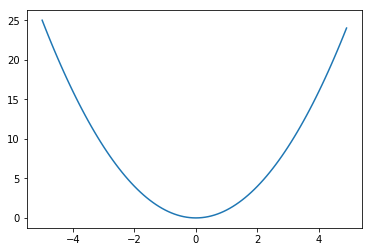

In [31]:
# Plot cuadratic function L it us just a parabole x**2
# with minimum at 0 but we don't know it ;-)
plot_f(L,-7,7)

Again a random guess could be $w=6$, where $L(w)=L(6)=6^2=36$. Now we have a point in the loss parabole.

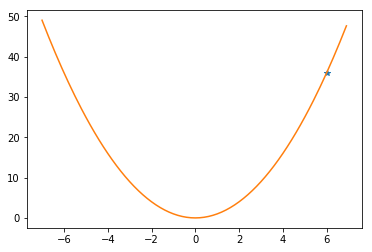

In [32]:
#Initial weight. We start with a random guess
#you can play changing this value
w=6
# Plot the parabole and the point (6,36)
plt.plot(6,36,"*")
plot_f(L,-7,7)


Now we need to change the value of $w$. What of the two next option will chose?
* $w=7$ 
* $w=5$
It seem that the second option is the best, but Why?

Well we can see that $L(5)<L(6)$ or other way of see it is that is better decrease $w$ in $1$ that increase $w$ in $1$, because if we decrease $w$ in $1$ we get a lower value of $L(w)$. 

Then given that $L(6)-L(5)>0$ and $L(6)-L(7)<0$ we know that the parabola in 6 is growing or the slope is uphill.

It could be wonderful if we had a magic function that tell us if the slope is uphill or downhill for a given w, without the need of do the calculation.

Well that magic function actually exist and it name is: derivative, gradient.

Actually the the derivative of $L(w)=w^2$ at any point $w$ is very easy to work out. It is $\partial{L}(w)=2w$. 

In [ ]:
# And the unit variation of L at point w I mean: derivative, gradient, slope of L at w.
def dL(w):
    dy=2*w
    return dy

Then the sign of the derivative give us a hint of how to increment the current value of $w$.

Let see the slope of $L$ at point $w=6$ whose value is $\partial{L}(6)=12$, positive, then we know we have to decrement $w$.

Current values: w,L(w),dL(w)= 6 36 12


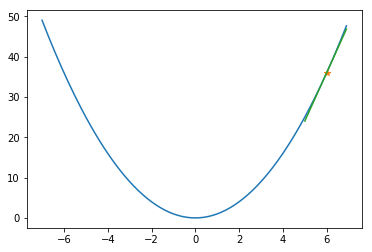

In [35]:
# we plot the slope line of L at w
plot_f(L,-7,7)
plot_df(L,dL,w)
print("Current values: w,L(w),dL(w)=",w,L(w),dL(w))

Then we can deduce the main rule of Gradient Descent technique that is:

the change to do to $w$ at step $k$, $w_k$, we will call it $\Delta{w_k}$, has the opposite sign of the derivative, that is $-\partial{L}(w_k)$.

$$\Delta{w_k}=-\partial{L}(w_k)$$

And the update rule is:

$$w_{k+1}=w_k+\alpha\Delta{w_k}$$

It appears a multiplicative factor $\alpha$ named Learning Rate, and it is used to set the size of the step to be taken.

Now with this magic weapon on hand we can tackle the problem of finding the minimun of a function. In our case this function is the loss function $L(w)$. 

Someone could be thinking that it would had been very much easy just solve the variable $w$ to get a value of $\partial{L}(w)=0$. But in the following examples $L(w)$ is going to be very complicated and this wouldn't be posible anymore.

### Let apply Gradient Descent in the above example
Let apply five times the change rule above commented to our toy example.

##### But before, some comment about $\alpha$, the Learning Rate
We know we have to change $w$ in $\delta{w}$ direction but we don't know how much

$alpha$ make a guess in order to change $w$ enough.

Rule of thumb:

* If $\alpha$ is too little we need many steps
* but  if $\alpha$ is not little enough it will never work out minimum
* then is better a little slow $\alpha$ than a bigger unstable one


Initial values: 6 36 12
Final values: 0.061440000000000036 0.0037748736000000043 0.12288000000000007


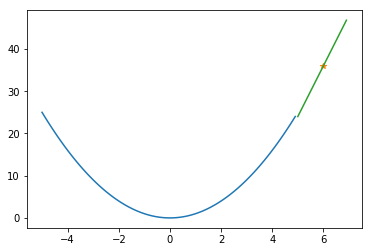

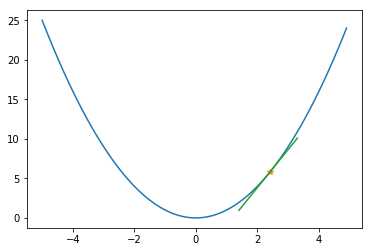

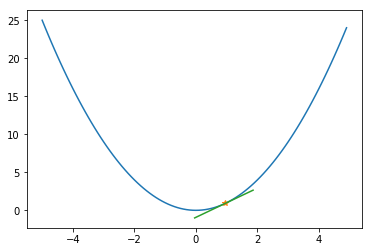

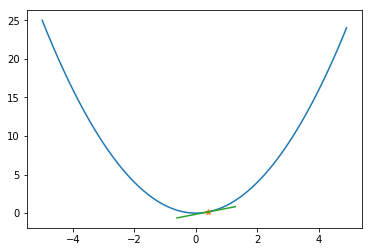

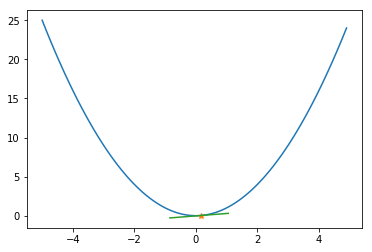

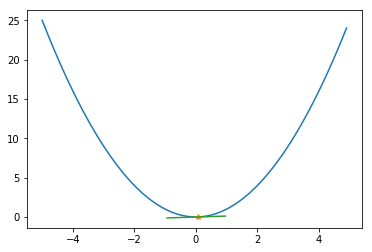

In [13]:
#Initial weight, cost value, slope
print("Initial values:",w,L(w),dL(w))
#Learning rate
#You can play changing this value
a=0.3
#if you change a=1 and w=3 the system osucilate. Try it!!
#GD 5 Steps
for i in range(5):
    plt.figure()
    plot_f(L,-5,5)
    # weight increment
    # we go in opposite direction of slope
    # because we want to minimize
    iw=-dL(w)
    #weight update
    # We know we have to change w in iw direction but we don't know how much
    # 'a' makes a guess in order to change w enough
    # Rule of thumb: If 'a' is too little we need many steps
    #           but  if 'a' is not little enough it will never work out minimum
    #                then is better a little slow a than a bigger unstable one
    # a=0.1 little slow -> 3.865 after 5 steps
    # a=0.3 good        -> 0.003 error after 5 steps
    # a=1 or above 1    -> it oscilate
    w=w+a*iw
    plot_df(L,dL,w)
#Final weight, cost value, slope
print("Final values:",w,L(w),dL(w))
# We need to continue in order to get w=0 but as we can si each step we are closer

# Back to our Linear Regression Example 
Let go back to our Linear Regression example, but before to start to solve the problem, let make some comment with this new matrix version of the problem.

We are going to work with the same problem that above but in matrix form, this is for three reasons:

* calculations become easier
* we cal work with many dimmensions/data at once
* it is the most generic form used

Now our data is defined as two matrix:

In [38]:
#Data, first row are ones for bias
x=np.matrix([[ 1.0, 1.0, 1.0],
             [-2.0, 4.5, 6.2]])
y=np.matrix( [ 7.0, 9.0,18.0])

Each data if a column, we have used a trick to simplify calculations, adding a first row of ones, that we will explain later.

Now $w$ is a matrix too.

In [39]:
#Initial weights
w=np.matrix([5.0,1.2])

The matrix version of $f$ is just the same $f(w,x)=wx$. 

Actually the equation is $f(w,x)=wx+b$, but if we add a first row of ones, $b$ get integrated on $w$.

In [48]:
#Matrix version of linear model
def fm(w,x):
    y=w*x
    return y

Let see that with this matrix form every thing is the same. We can plot the regression line and the data points.

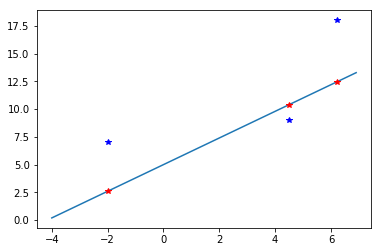

In [49]:
#Matrix version of linear model
def plots():
    #plotting, don't pay attention to this.
    plt.figure()
    plot_f(lambda x:w[0,1]*x+w[0,0],-4,7)
    plt.plot(x[1],fm(w,x),"*",color="red")
    plt.plot(x[1],y,"*",color="blue")
    plt.show()
#plotting
plots()

The loss function get very much easy expressed in matrix form:

$$L(w,x,y)=(y-f(w,x))(y-f(w,x))^T$$

As we can see the loss has the same value than above $52.2336$.

In [52]:
#Loss function
def L(w,x,y):
    dif=y-fm(w,x)
    l=dif*dif.T
    return l[0,0]
#this value is equal to the not matrix version above
print("Loss=",L(w,x,y))

Loss= 52.2336


And the derivative with respect to w, since data is constant, of this loss is very easy in matrix form:

$$\frac{\partial{L}(w,x,y)}{\partial{w}}=(y-f(w,x))x^T$$

It is very importan to be aware of the term: $y-f(w,x)$ that we can call it error or dif, and it get a great role on the intuition of the traditional Backpropagation that we will see later on.
$$error(w,x,y)=dif(w,x,y)=y-f(w,x)$$

The loss and its derivative/gradient can be expressed in a easy way using dif(w,x,y):

$$L(w,x,y)=error(w,x,y)error(w,x,y)^T$$

$$\frac{\partial{L}(w,x,y)}{\partial{w}}=error(w,x,y)x^T$$

In [53]:
#Loss gradient is a vector with same dimensions as w
def dL(w,x,y):
    dif=y-fm(w,x)
    #print(dif)
    dL_w=-2*dif*x.T
    return dL_w

In [92]:
# Don't pay attention to this code is for
# 3D visualation of w and L(w) values
xl=[]
yl=[]
zl=[]
def saveToPlot3D(w,l):
    xl.append(w[0,0])
    yl.append(w[0,1])
    zl.append(l)

## Gradient Descent Matrix Form
The next code is almost identical to the used in the Gradient Descent intuition, but now it works with matrixes. This allows to work with almost any kind of data types, from images, to sound, finantial,..

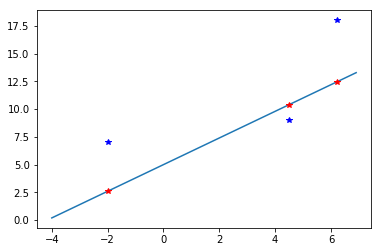

w    = [[ 5.   1.2]]
L(w) = 52.2336
dL(w)= [[-17.12  -38.744]]


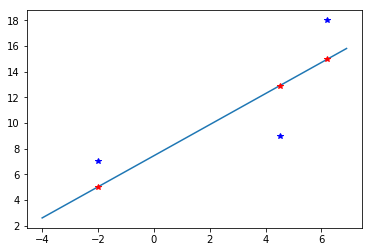

w    = [[ 7.44693977  1.21065218]]
L(w) = 28.3524743904
dL(w)= [[-2.25301345  5.16832237]]


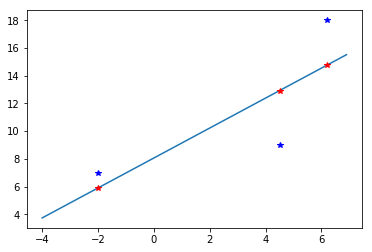

w    = [[ 8.0595796   1.08081377]]
L(w) = 27.0998846035
dL(w)= [[-0.8363629  -0.45088511]]


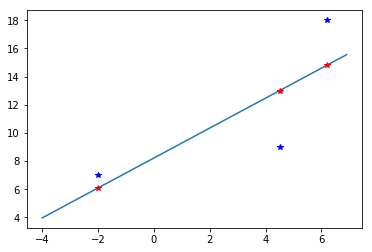

w    = [[ 8.21993351  1.06290321]]
L(w) = 27.0211231937
dL(w)= [[-0.18588303  0.09364805]]


In [93]:
#Matrix version of Gradient descent
#Learning rate
a=0.015
#Initial weights
w=np.matrix([5.0,1.2])
for i in range(100):
    if i%25==0:
        #plotting
        plots()
        print("w    =",w)
        print("L(w) =",L(w,x,y))
        print("dL(w)=",dL(w,x,y))
        saveToPlot3D(w,L(w,x,y))
    iw=-dL(w,x,y)
    w=w+a*iw

In the Gradient Descent intuition we used a 1D loss function, but now we have used a 2D lost function since we need $w_0$ for intercept and $w_1$ for slope to define a line function $f(w,x)=w_1x+w_0$. Then in order to visualize the w evolution we need a 3D plot, with $x$ axis as $w_0$, $y$ axis as $w_1$ and $z$ as loss.

In the next plot we can se the evolution of $w$ in the surface defined by $L(w)$. We can see the this surface is convex and if we drop a ball on it the final point (x,y) are the optimal values for w in order to minimize the loss to fit the line to the data points. All the gradient descent do is just follow the way of a ball falling in that surface.

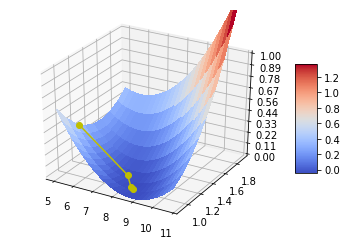

In [94]:
'''
3Dd visualization of the 2D loss surface
Axis x is w0 and y is w1
If we drop a ball on this surface the final point (x,y) is the final values of w
'''
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
w0 = np.arange(5, 11,0.25)
w1 = np.arange(0.9, 2, 0.125)
X, Y = np.meshgrid(w0, w1)
Z=np.zeros_like(X)
for i in range(w0.shape[0]):
    for j in range(w1.shape[0]):
        w[0,0]=w0[i]
        w[0,1]=w1[j]
        Z[j,i]=(L(w,x,y)-30)/60
        #print("w=",w,"Z[j,i]=",Z[j,i])

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Scatter gradient points
#scatter=ax.scatter(np.array(xl),np.array(yl),(np.array(zl)-30)/60,c="y", marker="o")
ax.plot(np.array(xl),np.array(yl),(np.array(zl)-30)/60,c="y", marker="o")

# Customize the z axis.
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Gradient Descent Algoritm in 4 lines of code
As we saw in above examples the Gradient Descent Algoritm can be coded in a few lines of code. This code could be improved, but eventually it work with almost any problem we want to solve and it is the baseline of all deep learning algoritms.

In [ ]:
#Matrix version of Gradient descent
#Learning rate
a=0.015
#Initial weights
w=np.matrix([5.0,1.2])
for i in range(Nsteps):
    iw=-dL(w,x,y)
    w=w+a*iw

All we need now is define all kind of loss functions $L(w,x,y)$ associated with they function $f(w,x)$ witch is named Model or Predictor, since, once the w parameter are estimated, it will predict new values for $y$ given new values, never seen, of $x$.

# More generic loss functions
Firstly let talk about the Line Model defined in the above examples: $f(w,x)=wx$. Having that into account we can define the loss as:

$$L(w,x,y)=(y-f(w,x))(y-f(w,x))^T=(y-wx)(y-wx)^T$$

and the derivative/gradient with respect to $w$ is:

$$\frac{\partial{L}(w,x,y)}{\partial{w}}=(y-f(w,x))x^T=(y-wx)x^T$$

as we saw earlier.

But given a more generic and unknow definition of $f(w,x)$ the generic loss is the same:

$$L(w,x,y)=(y-f(w,x))(y-f(w,x))^T$$

but a more generic gradient expresion is:

$$\frac{\partial{L}(w,x,y)}{\partial{w}}=(y-f(w,x))\frac{\partial{f}(w,x)}{\partial{w}}$$

for the case of the above linear model $f(w,x)=wx$:

$$\frac{\partial{f}(w,x)}{\partial{w}}=\frac{\partial{wx}}{\partial{w}}=x^T$$

In order to understand properly the traditional backpropagation algoritm that we sill see later, it is worth be aware of the next expresion:

$$\frac{\partial{L}(w,x,y)}{\partial{w}}=dif(w,x,y)\frac{\partial{f}(w,x)}{\partial{w}}=error(w,x,y)\frac{\partial{f}(w,x)}{\partial{w}}$$

where $dif(w,x,y)$ if definned as above:

$$dif(w,x,y)=error(w,x,y)=y-f(w,x,y)$$

The loss we have been working till now is the based in sum of square differences, but other loss functions can be defined. For classification there are mainly two loss functions, both based on crossentropy

## Loss Cross Entrophy for Sigmoid
From now on we will change the name of the linear model used till now from $f(w,x)=wx$ to $lin(w,x)=wx$, the name change but the expression is the same.

For the case of Binary Linear Classificaction also know as Logistic Regression, the model $f(w,x)$ is deffined as a shrinking of the linear model $lin(w,x)$. The shrinking function is $sig(x)$. Then:

$$f(w,x)=sig(lin(w,x))=sig(wx)=\frac{1}{1+e^{-lin(w,x)}}=\frac{1}{1-e^{-wx}}$$

given the definition of $sig(x)$:

$$sig(x)=\frac{1}{1+e^{-x}}$$

For this model the sum of square differences loss doesn't work properly and its derivative is very complicates. On the other hand a loss based on crossentropy works much better and its derivative is very easy, just like the one for lineal models.

The crossentropy loss for sigmoid is defined as:

$$L(w,x,y)=L(f(w,x),y)=-\sum_i y_i\cdot log(f(w,x_i))+(1-y_i)\cdot log(1-f(w,x_i))$$

and the gradient of this loss is very easy:

$$\frac{\partial{L}(w,x,y)}{\partial{w}}=(y-f(w,x))x^T<>(y-wx)x^T$$

It look like very much to the expression for linear gradient but care have to be taken since unrolling the expresion we have two diferent things.

In one hand we have, for linear regression model:

$$\frac{\partial{L}(w,x,y)}{\partial{w}}=(y-f(w,x))x^T=(y-wx)x^T$$

On the other hand, for the binary linear classification model:

$$\frac{\partial{L}(w,x,y)}{\partial{w}}=(y-f(w,x))x^T=(y-\frac{1}{1+e^{-wx}})x^T$$


### Expression derivation
This section can be skipped with any problem.

We want to derive this expression:

$$\frac{\partial{L}(w,x,y)}{\partial{w}}=(y-f(w,x))x^T$$

Using the chain rule we have that:

$$\frac{\partial{L}(w,x,y)}{\partial{w}}=\frac{\partial{L(f(w,x),y)}}{\partial{f(w,x)}}\frac{\partial{sig}(lin(w,x))}{\partial{lin}(w,x)}\frac{\partial{lin(w,x)}}{\partial{w}}$$

given the equality:

$$f(w,x)=sig(lin(w,x))$$

The derivative of sigmoid is:

$$\frac{\partial{sig}(lin(w,x))}{\partial{lin}(w,x)}=sig(lin(w,x))(1-sig(lin(w,x)))$$

The gradient of Cross Entropy loss for Softmax is:

$$\frac{\partial{L(f(w,x),y)}}{\partial{f(w,x)}}=\frac{-y}{f(w,x)}+\frac{1-y}{1-f(w,x)}=\frac{f(w,x)-y}{f(w,x)(1-f(w,x)}$$

For the linear model we have:

$$\frac{\partial{lin(w,x)}}{\partial{w}}=\frac{\partial{wx}}{\partial{w}}=x^T$$

Putting it all together:

$$\frac{\partial{L}(w,x,y)}{\partial{w}}=\frac{f(w,x)-y}{f(w,x)(1-f(w,x)}sig(lin(w,x))(1-sig(lin(w,x)))x^T$$

Working out:

$$\frac{\partial{L}(w,x,y)}{\partial{w}}=(f(w,x)-y))x^T$$

Some sign seem to have been lost in the derivation.

## Loss Cross Entropy for Softmax

# Binary Linear Classification
Now we are going to see a real example of recognition of hand written digits from de data set MNIST.

Firstly we are going to classify images of one versus images of zero. The process is mainly as the above examples but using loss Cross entropy for softmax instead of the square of differences loss.

Most of the work is on sorting out all the data in order to make a proper classification.
One of the "trick" used on classification is assign a number for every class but this number is coded as a one hot encoding, that is, if we have four classes {0,1,2,3} then we code each class as {(1,0,0,0),(0,1,0,0),(0,0,1,0),(0,0,0,1)}. In this first example we have only two classes then we only need a number with values 0 or 1.

Let read all the data from the file mnist.pkl.gz. Each image is a 28x28 gray scale matrix reshaped to a 784 one dimension vector. There are 50000 training images.

In [121]:
#Binary Linear Classification
#Let apply the above to a real problem
#handwritten digit recognition
#
#Firstly start collecting the data
import pickle, gzip, numpy

# Load the dataset
# There is a train set, a validation seet and a test set.
# -Train set is to train the models
# -Validation set is to validate models
# -Test set is to test the final model
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f,encoding='iso-8859-1')
f.close()

print(train_set[0].shape)
print(train_set[1].shape)

(50000, 784)
(50000,)


4


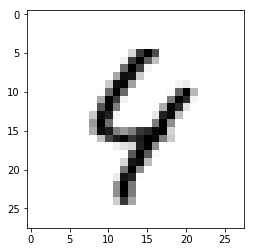

In [122]:
digitToSee=24530
plt.imshow(train_set[0][digitToSee].reshape(28,28), cmap="gray_r")
print(train_set[1][digitToSee])
plt.show()

In [123]:
#this function add a row of ones to the first row of a matrix
#in order to have a bias term
def addOnesFirstRow(m):
    ones=np.ones(m.shape[1])
    rm=np.vstack([ones,m])
    return rm

In [124]:
N=1000 #data samples
print("Trainning with",N,"data samples.")
D=train_set[0][0].shape[0]
print("Each sample as a dimension of",D,".")
#We are going to recognize digits zero and one
train_zeros_ones_x=np.matrix([train_set[0][i] for i in range(train_set[0].shape[0]) if train_set[1][i]==0 or train_set[1][i]==1][:N]).T
train_zeros_ones_x=addOnesFirstRow(train_zeros_ones_x)
train_zeros_ones_y=np.matrix([train_set[1][i] for i in range(train_set[0].shape[0]) if train_set[1][i]==0 or train_set[1][i]==1][:N])

valid_zeros_x=np.matrix([valid_set[0][i] for i in range(valid_set[0].shape[0]) if valid_set[1][i]==0][:N]).T
valid_zeros_x=addOnesFirstRow(valid_zeros_x)
valid_ones_x =np.matrix([valid_set[0][i] for i in range(valid_set[0].shape[0]) if valid_set[1][i]==1][:N]).T
valid_ones_x=addOnesFirstRow(valid_ones_x)

Trainning with 1000 data samples.
Each sample as a dimension of 784 .


In [125]:
print(train_zeros_ones_x.shape)
print(train_zeros_ones_y.shape)
print(valid_zeros_x.shape)
print(valid_ones_x.shape)

(785, 1000)
(1, 1000)
(785, 991)
(785, 1000)


In [126]:
# x images and y labels
x=train_zeros_ones_x
y=train_zeros_ones_y
print(x.shape)
print(y.shape)

(785, 1000)
(1, 1000)


In [129]:
#Learning rate
a=0.01

#Init weights random normal with 1/sqrt(D) variance, data dimension + 1 for bias
w=np.matrix(np.random.normal(0,1.0/np.sqrt(D),D+1))
#Init the bias to 0 not random
w[0,0]=0
print(w.shape)

#Binary Lineal Classification model
def Lin(w,x):
    return w*x
def dLin_w(w,x):
    return x.T
def Sigmoid(l):
    return 1.0/(1.0+np.exp(-l))
def dSigmoid(l):
    s=Sigmoid(l)
    return s*(1.0-s)
#Function is linear but shrinked to [0,1]
def f(w,x):
    l=Lin(w,x)
    return Sigmoid(l)
def df(w,x):
    return dSigmoid(Lin(w,x))*dLin_w(w,x)
#Loss is binary cross entropy
def L(w,x,y):
    fwx=f(w,x)
    cross1=np.multiply(y,np.log(fwx))
    cross0=np.multiply((1.0-y),np.log(1-fwx))
    l=-np.sum(cross1+cross0)/N
    return l
#Gradient has almost the same expresion as in less square loss
def dL(w,x,y):
    dif=f(w,x)-y
    return dif*x.T/N

#Learning as always
i=0
while i<1000:
    iw=-dL(w,x,y)
    w=w+a*iw
    if i%100==0:
        print(i,"L(w,x,y)=",L(w,x,y),"iw=",np.min(iw),np.max(iw))
    i+=1
print(i,"L(w,x,y)=",L(w,x,y),"iw=",np.min(iw),np.max(iw))


(1, 785)
0 L(w,x,y)= 0.710270075882 iw= -0.177402834805 0.255652305104
100 L(w,x,y)= 0.115874700601 iw= -0.0224645938878 0.0609039921635
200 L(w,x,y)= 0.0671332664223 iw= -0.0129424449854 0.0341723162824
300 L(w,x,y)= 0.0490915499197 iw= -0.00927803502649 0.0242394980821
400 L(w,x,y)= 0.0395492497408 iw= -0.0074959013981 0.0190017749245
500 L(w,x,y)= 0.0335835982373 iw= -0.00635369311945 0.0157431007381
600 L(w,x,y)= 0.0294699472774 iw= -0.00555374560859 0.0135087084033
700 L(w,x,y)= 0.0264440296929 iw= -0.0049594021735 0.0118751801939
800 L(w,x,y)= 0.0241137834795 iw= -0.00449874427116 0.0106253405525
900 L(w,x,y)= 0.0222567500855 iw= -0.00413016611088 0.0096360304985
1000 L(w,x,y)= 0.020750855702 iw= -0.00383061450518 0.00883935639413


In [130]:
sample=valid_ones_x
#plt.imshow(sample.reshape(28,28), cmap="gray_r")
#plt.show()
print(sample.shape)
print(np.sum(f(w,sample)>0.5))

(785, 1000)
999


In [131]:
sample=valid_zeros_x
#plt.imshow(sample.reshape(28,28), cmap="gray_r")
#plt.show()
print(sample.shape)
print(np.sum(f(w,sample)<0.5))

(785, 991)
988


-0.170051031129 0.313620645019
(1, 785)
(1, 784)


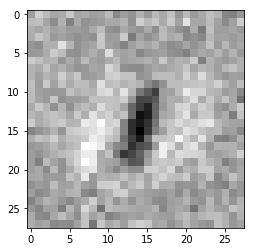

In [132]:
print(np.min(w),np.max(w))
print(w.shape)
imgw=w[:,1:]
print(imgw.shape)
plt.imshow(imgw.reshape(28,28), cmap="gray_r")
plt.show()


(10, 50000)
(50000,)
(785, 50000)
[[ 1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[5 0 4 1 9 2 1 3 1 4]
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


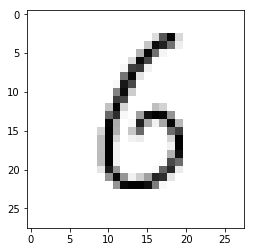

In [142]:
N=train_set[0].shape[0]
D=train_set[0].shape[1]
train_set_x=addOnesFirstRow(np.matrix(train_set[0]).T)
#one hot encoding
train_set_y=np.matrix(np.zeros((10,N)))
train_set_y[train_set[1],np.arange(N)]=1
print(train_set_y.shape)
print(train_set[1].shape)
print(train_set_x.shape)
print(train_set_x[:5,:5])
print(train_set[1][:10])
print(train_set_y[:,:10])
x=train_set_x
y=train_set_y
plt.imshow(train_set_x[1:,18].reshape(28,28),cmap="gray_r")
plt.show()


In [143]:
#Learning rate
a=0.1

#Init weights random normal with 1/sqrt(D) variance, data dimension + 1 for bias
w=np.matrix(np.random.normal(0,1.0/np.sqrt(D),10*(D+1)).reshape(10,D+1))
#Init the bias to 0 not random
w[:,0]=0
print(w.shape)
#print(w[:,:4])

#Binary Lineal Classification model
def Lin(w,x):
    return w*x
def dLin_w(w,x):
    return x.T
def Softmax(l):
    #trick to avoid numerical unstability
    l-=np.max(l,axis=0)
    e=np.exp(l)
    s=np.sum(e,axis=0)
    p=e/s
    return p
#Function is linear but shrinked to [0,1]
def f(w,x):
    l=Lin(w,x)
    return Softmax(l)
#Loss is categorical cross entropy
def L(w,x,y):
    fwx=f(w,x)
    cross=np.multiply(y,np.log(fwx))
    l=-np.sum(cross)/N
    return l
#Gradient has almost the same expresion as in less square loss
def dL(w,x,y):
    p=f(w,x)
    dif=p-y
    dl=dif*x.T
    return dl/N

#Learning as always
i=0
while i<1000:
    iw=-dL(w,x,y)
    w=w+a*iw
    if i%50==0:
        print("L(w,x,y)=",L(w,x,y),"iw=",np.min(iw),np.max(iw))
    i+=1
print("L(w,x,y)=",L(w,x,y),"iw=",np.min(iw),np.max(iw))

(10, 785)
L(w,x,y)= 2.26945777897 iw= -0.0735914065399 0.0558234162909
L(w,x,y)= 0.805649750203 iw= -0.0144248385317 0.0181837544095
L(w,x,y)= 0.618928536543 iw= -0.00888078076466 0.0107877520944
L(w,x,y)= 0.541847255386 iw= -0.00768991308182 0.00779120738074
L(w,x,y)= 0.497912990328 iw= -0.00701351150709 0.00599266414935
L(w,x,y)= 0.468809483102 iw= -0.00651656273056 0.00490037473141
L(w,x,y)= 0.447765854124 iw= -0.00612385014952 0.00469830690611
L(w,x,y)= 0.431652075022 iw= -0.00579885926662 0.00452219844571
L(w,x,y)= 0.418804279574 iw= -0.00552148374218 0.00436660454381
L(w,x,y)= 0.408248549942 iw= -0.00527955561193 0.00422752183859
L(w,x,y)= 0.399373080434 iw= -0.00506515508031 0.00410197002112
L(w,x,y)= 0.39177216166 iw= -0.00487282415027 0.00398768474652
L(w,x,y)= 0.385164976616 iw= -0.004698626618 0.00388290955903
L(w,x,y)= 0.379350275847 iw= -0.00453961852413 0.00378625611968
L(w,x,y)= 0.374179617792 iw= -0.00439353229157 0.00369660897709
L(w,x,y)= 0.369540823663 iw= -0.0042585

In [118]:
p=f(w,x)
print(train_set[1][:10])
print((p[:,:10]>0.5)*1)

[5 0 4 1 9 2 1 3 1 4]
[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 1 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]


-0.585065591777 0.502765898216
(10, 785)


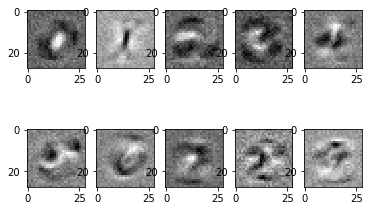

In [119]:
print(np.min(w),np.max(w))
print(w.shape)
for i in range(10):
    plt.subplot(2, 5, i+1)
    imgw=w[i,1:]
    plt.imshow(imgw.reshape(28,28), cmap="gray_r")
plt.show()
